In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [51]:
# Load data
df = pd.read_parquet('train.parquet')

In [52]:
# Filter for "Target Drug" incidents only
df_target = df[df['Incident'] == 'TARGET DRUG']

In [53]:
# Create matrix of prescription counts
df_pivot = df_target.pivot_table(index='Patient-Uid', columns=pd.Grouper(key='Date', freq='M'), 
                                 values='Incident', aggfunc='count', fill_value=0)


In [54]:
# Normalize matrix by row
df_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)


In [62]:
# Cluster patients using KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_norm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

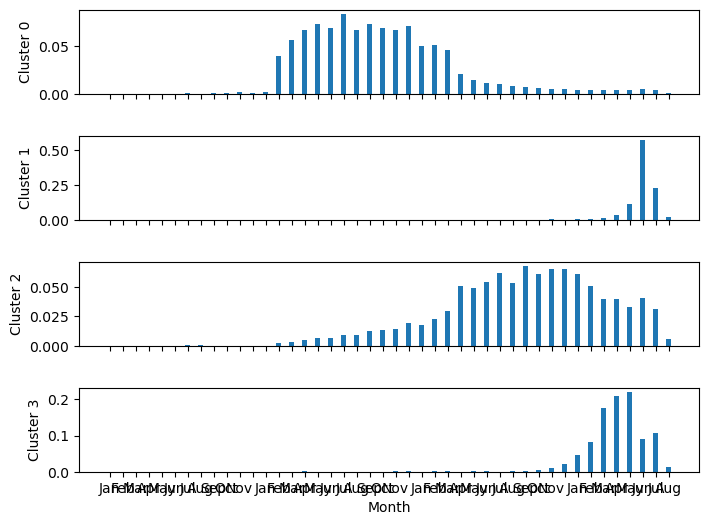

In [67]:
import calendar

# get cluster centers
cluster_centers = kmeans.cluster_centers_

# create bar plot
fig, ax = plt.subplots(kmeans.n_clusters, 1, figsize=(8, 6), sharex=True)
x = np.arange(len(cluster_centers[0]))
width = 0.35
for i, cluster in enumerate(cluster_centers):
    ax[i].bar(x, cluster, width)
    ax[i].set_ylabel(f'Cluster {i}')
ax[-1].set_xlabel('Month')

# set x-ticks and labels to represent months
month_labels = [calendar.month_name[(i+1) % 12][:3] for i in range(len(x))]
ax[-1].set_xticks(x)
ax[-1].set_xticklabels(month_labels)

# add some space for y-ticks
plt.subplots_adjust(hspace=0.5)

plt.show()
